<a id='home'></a>
### purpose

see how the degree of local adaptation affects performance

strict scatter plot with LA on x-axis and performance on y-axis, color code points by methods

In [1]:
from pythonimports import *
from myfigs import save_pdf

import MVP_summary_functions as mvp

import seaborn as sns
plt.rcParams.update({'font.family' : 'serif'})

t1 = dt.now()  # notebook timer

summarydir = '/work/lotterhos/MVP-Offsets/run_20220919/summaries'
savedir = makedir(op.join(summarydir, 'figs/04_performance_vs_local-adaptation'))
pkldir = op.join(summarydir, 'all_performance_dicts')

mvp.latest_commit()
session_info.show()

#########################################################
Today:	December 21, 2023 - 09:45:15 EST
python version: 3.8.5
conda env: mvp_env

Current commit of pythonimports:
commit 419895d157c97717f835390196c13cf973d25eba  
Merge: e20434f 1e09b6c  
Author: Brandon Lind <lind.brandon.m@gmail.com>

Current commit of MVP_offsets:
commit c5bc403582e5bafc1036be8cd2a4bb0b4d154623  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Mon Dec 18 14:38:19 2023 -0500
#########################################################



In [2]:
# get validation scores across gardens across reps
all_scores = mvp.combine_level_dicts(
    use_bcs_data=False,
    keep_nuisance=False,
#     repdirs = ['/work/lotterhos/MVP-Offsets/run_20220919_0-225']
)

filtering criteria:
	use_bcs_data = False
	performance = garden_performance
	num_traits = None
	ntraits = None
	marker_set = None
	remove_structcrxn = False
	keep_nuisance = False
	remove_rda_outliers = True


reading reps: 100%|███████████████| 10/10 [00:24<00:00,  2.44s/it]


0-225
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


225-450
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


450-675
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


675-900
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


900-1125
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


1125-1350
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


1350-1575
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


1575-1800
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


1800-2025
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


2025-2250
	 RONA num seeds =  225
	 lfmm2 num seeds =  22

In [3]:
landscape_dict = all_scores['GF']['landscape'].to_dict()  # key = seed, val = landscape

In [4]:
# from 02.04.05
# # make local adaptation bins copied from 02_analysis/04_outlier_climate_runs/05_visualize_validation_of_outlier_predictions.ipynb

# validation = mvp.combine_program_data(all_scores)

# num_bins = 3

# color_map = sns.color_palette("ch:s=-.2, r=.6", n_colors=num_bins)[:-1]

# validation['final_la_bin'] = np.nan
# labels = []
# for x in np.linspace(validation.final_LA.min(), validation.final_LA.max(), num_bins)[1:]:
#     current_bin = round(x, 2)

#     if len(labels) == 0:
#         label = f'%s < LA ≤ {current_bin}' % validation.final_LA.round(2).min()
#     else:
#         label = f'{last_bin} < LA ≤ {current_bin}'
        
#     last_bin = current_bin
    
#     print(label)
    
#     validation.loc[(validation.final_LA <= x) & (validation.final_la_bin.isnull()), 'final_la_bin'] = label
    
#     mvp.boxplot_kwargs['palette'][label] = color_map[len(labels)]
    
#     labels.append(label)
    
# # add metadata
# mvp.hue_order['final_la_bin'] = labels  #[::-1]

# # add metadata
# for label in labels:
#     mvp.factor_names[label] = label

# # add metadata
# mvp.factor_names['final_la_bin'] = 'Local Adaptation'

# use seed-level median garden validation score for plotting

In [5]:
hue_dicts = {}
for hue in keys(mvp.hue_order):
    if hue in ['program', 'final_la_bin']:
        continue
        
    hue_dicts[hue] = all_scores['GF'][hue].to_dict()  # key = seed val = hue ('GF' key doesn't matter)

def create_sns_dataframe(data, print_cors=False):
    """Create long-form dataframe for seaborn."""
    df = pd.DataFrame(columns=['seed', 'program', 'score', 'shape', 'landscape'])
    for program, seed_scores in data.items():  # seed_scores is pd.Series w/index=seed & value=score; name='score'
        seeddf = pd.DataFrame(seed_scores)
        seeddf['program'] = program
        seeddf['seed'] = seeddf.index.tolist()
        seeddf['landscape'] = seeddf.index.map(landscape_dict)
        seeddf['shape'] = seeddf.program.map(mvp.markers)
        
        df = df.append(seeddf)

    summary = mvp.get_summary_data()
            
    df['final_LA'] = df.seed.map(summary['final_LA'])

    df['seed'] = df['seed'].astype(int)
    df['score'] = df['score'].astype(float)
    df['final_LA'] = df['final_LA'].astype(float)
    
    if print_cors is True:
        for program in df.program.unique():
            prog_df = df[df.program == program].copy()
            rho = prog_df.score.corr(prog_df.final_LA, method='spearman').round(2)
            print(f'\t{program = }', rho)
    
    for hue, hue_dict in hue_dicts.items():
        df[hue] = df.index.map(hue_dict)

    return df


def create_fig(num_traits=1, marker_set='all', hue='program', apply_median=True, loc='center left',
               markerfacecolor='none', print_cors=False):
    """Use kwargs to filter data to create lmplot colored by `hue`.
    
    Notes
    -----
    - filtering with subset_data will include ntraits-1 and ntraits-2 for 1-trait sims.
    """
#     def subset_dataframe(df, num_traits=None, ntraits=None, marker_set=None, remove_structcrxn=False,
                            # keep_nuisance=True, remove_rda_outliers=True, bcs=False):
#     filtering criteria:
#         use_bcs_data = False
#         performance = garden_performance
#         num_traits = None
#         ntraits = None
#         marker_set = None
#         remove_structcrxn = False
#         keep_nuisance = False
#         remove_rda_outliers = True
        
    data = create_sns_dataframe(
        mvp.subset_data_scores(all_scores, num_traits=num_traits, marker_set=marker_set,
                               keep_nuisance=False, apply_median=apply_median),
        print_cors=print_cors
    )

#     program_order = mvp.hue_order['program'] #['RONA-sal_opt', 'RONA-temp_opt', 'lfmm2', 'rda', 'GF']
    print(pd.Series(mvp.hue_order[hue]).map(mvp.markers).tolist())

    g = sns.lmplot(data=data, x='final_LA', y='score', hue=hue,
                   hue_order=mvp.hue_order[hue],
                   scatter_kws={'facecolor' : 'none'} if hue != 'landscape' else None,
                   palette=mvp.boxplot_kwargs['palette'],
                   legend=False,
                   markers=pd.Series(mvp.hue_order[hue]).map(mvp.markers).tolist() if hue in ['program', 'landscape'] else None)  # data['shape'].unique().tolist()
    
#     g.ax.set_title(f'{num_traits = }\n{marker_set = }\nseed-level median performance for each program\n')
    print(f'{num_traits = }\n{marker_set = }\nseed-level median performance for each program\n')
    
    g.ax.set_ylim((-1, 0.2))  # i know nothing goes beyond 0.2 - 🧠
    
    g.set_axis_labels("Degree of Local Adaptation (ΔSA)", "Median Performance (Kendall's $\\tau$)", fontsize=12)
    
    g.ax.axhline(0, linestyle='--', color='gainsboro', linewidth=1, zorder=0)
    
    g.ax.set_ylim(g.ax.get_ylim()[::-1])
    
    g.tight_layout()
    
    if loc == 'upper center':
        kwargs = dict(loc='upper center', bbox_to_anchor=(0.52, 1.08), ncol='auto') 
        if hue == 'program':
            kwargs.update({'bbox_to_anchor' : (0.52, 1.15)})
    elif loc == 'center left':
        kwargs = dict(loc='center left', bbox_to_anchor=(1.0, 0.52), ncol=1)
    
    print(f'{hue = }', kwargs['ncol'])
    
    mvp.add_legend(g.figure, color_by=hue, fontsize=8,
                   use_markers=True if hue in ['program', 'landscape'] else False,
                   legendmarkerfacecolor=markerfacecolor,
                   **kwargs
                  )

    g.figure.set_size_inches((8, 4))
    
    points = 'median' if apply_median is True else 'allgardens'
    
    loc = loc.replace(' ','_')
    save_pdf(op.join(savedir, f'final_LA_vs_validation_{num_traits}_{marker_set}_{hue}_{points}_{loc}.pdf'))
    
    plt.show()
    
    pass

RONA [200]
lfmm2 [100]
GF [100]
rda [200]
['+', 'x', '3']
num_traits = 2
marker_set = 'all'
seed-level median performance for each program

hue = 'landscape' auto
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_2_all_landscape_median_upper_center.pdf


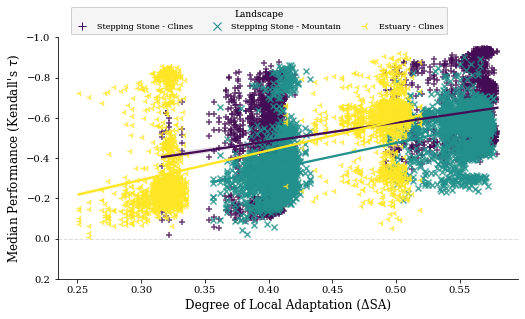

RONA [200]
lfmm2 [100]
GF [100]
rda [200]
['+', 'x', '3']
num_traits = 2
marker_set = 'all'
seed-level median performance for each program

hue = 'landscape' 1
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_2_all_landscape_median_center_left.pdf


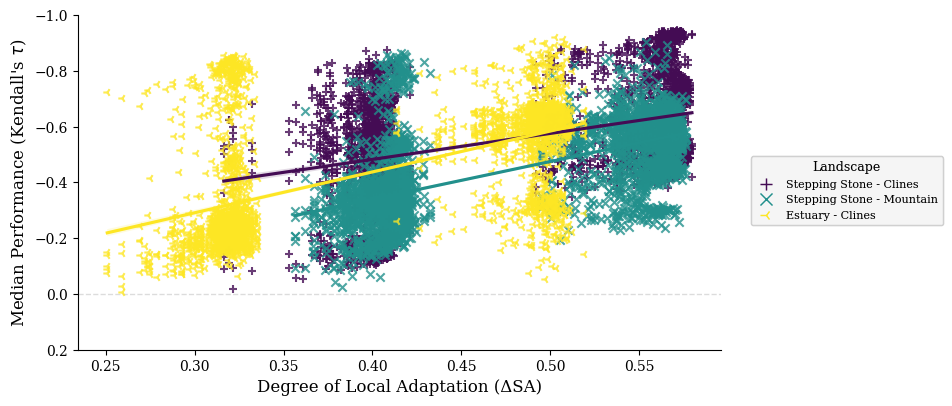

In [6]:
for loc in ['upper center', 'center left']:
    create_fig(hue='landscape',
               marker_set='all',
               loc=loc,
               num_traits=2,
               apply_median=True,
               print_cors=False)

RONA [200]
lfmm2 [100]
GF [100]
rda [200]
['<', '^', 'p', 's', 'D', 'o']
num_traits = 2
marker_set = 'all'
seed-level median performance for each program

hue = 'program' auto
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_2_all_program_median_upper_center.pdf


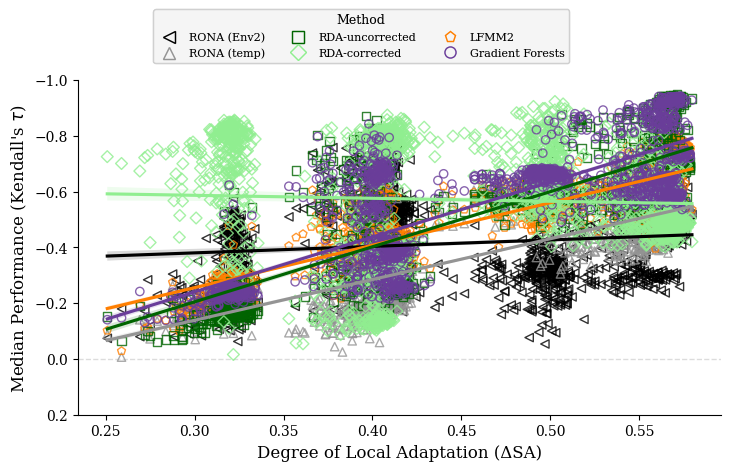

RONA [200]
lfmm2 [100]
GF [100]
rda [200]
['<', '^', 'p', 's', 'D', 'o']
num_traits = 2
marker_set = 'all'
seed-level median performance for each program

hue = 'program' 1
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_2_all_program_median_center_left.pdf


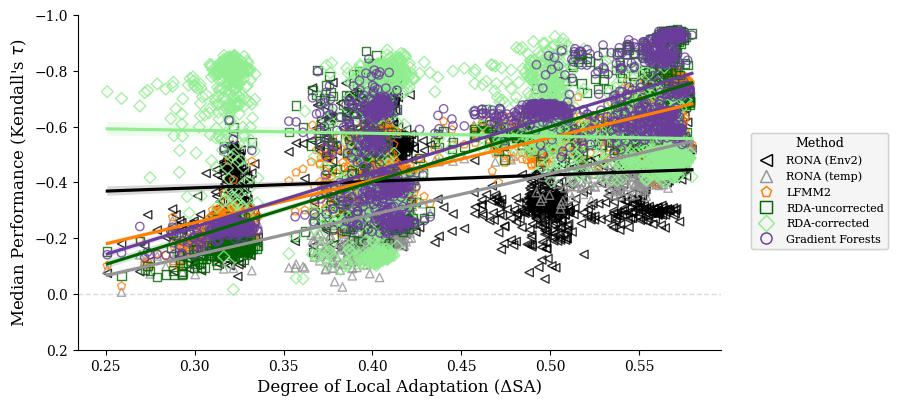

In [7]:
for loc in ['upper center', 'center left']:
    create_fig(hue='program',
               marker_set='all',
               loc=loc,
               num_traits=2,
               apply_median=True,
               print_cors=False)

RONA [100]
lfmm2 [100]
GF [100]
rda [200]
	program = 'RONA-temp_opt' -0.37
	program = 'lfmm2' -0.45
	program = 'GF' -0.29
	program = 'rda-nocorr' -0.38
	program = 'rda-structcorr' -0.37
['<', '^', 'p', 's', 'D', 'o']
num_traits = 1
marker_set = 'adaptive'
seed-level median performance for each program

hue = 'program' 1
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_1_adaptive_program_median_center_left.pdf


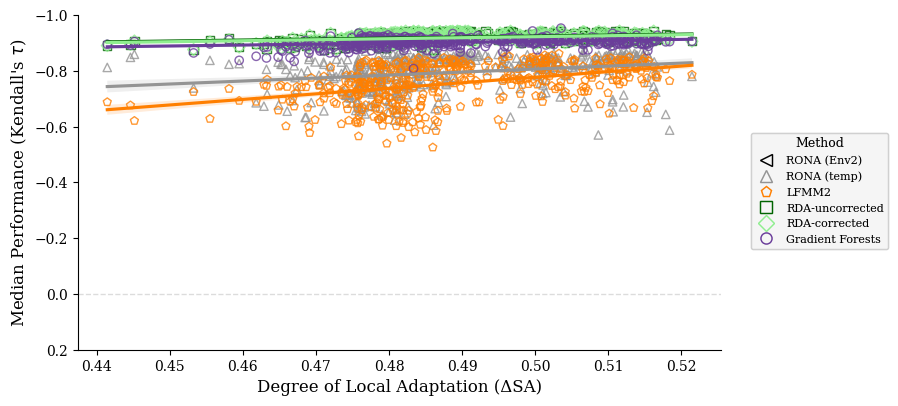

RONA [100]
lfmm2 [100]
GF [100]
rda [200]
['+', 'x', '3']
num_traits = 1
marker_set = 'adaptive'
seed-level median performance for each program

hue = 'landscape' 1
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_1_adaptive_landscape_median_center_left.pdf


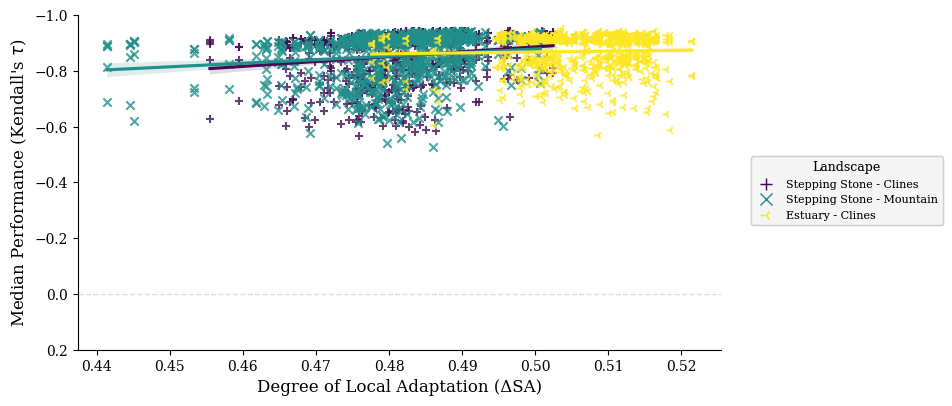

RONA [100]
lfmm2 [100]
GF [100]
rda [200]
	program = 'RONA-temp_opt' -0.83
	program = 'lfmm2' -0.51
	program = 'GF' -0.19
	program = 'rda-nocorr' -0.37
	program = 'rda-structcorr' -0.37
['<', '^', 'p', 's', 'D', 'o']
num_traits = 1
marker_set = 'neutral'
seed-level median performance for each program

hue = 'program' 1
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_1_neutral_program_median_center_left.pdf


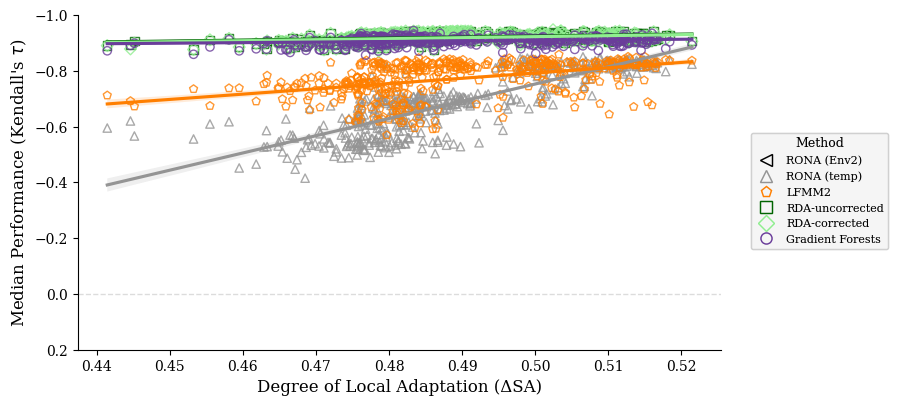

RONA [100]
lfmm2 [100]
GF [100]
rda [200]
['+', 'x', '3']
num_traits = 1
marker_set = 'neutral'
seed-level median performance for each program

hue = 'landscape' 1
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_1_neutral_landscape_median_center_left.pdf


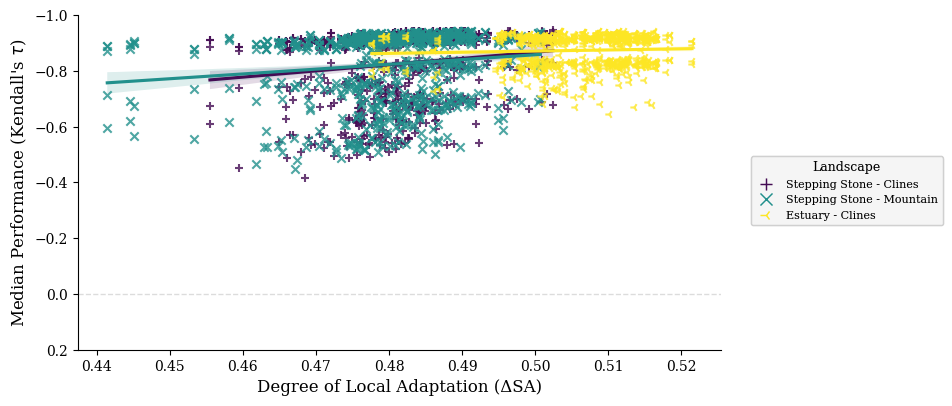

RONA [100]
lfmm2 [100]
GF [100]
rda [200]
	program = 'RONA-temp_opt' -0.83
	program = 'lfmm2' -0.52
	program = 'GF' -0.23
	program = 'rda-nocorr' -0.38
	program = 'rda-structcorr' -0.4
['<', '^', 'p', 's', 'D', 'o']
num_traits = 1
marker_set = 'all'
seed-level median performance for each program

hue = 'program' 1
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_1_all_program_median_center_left.pdf


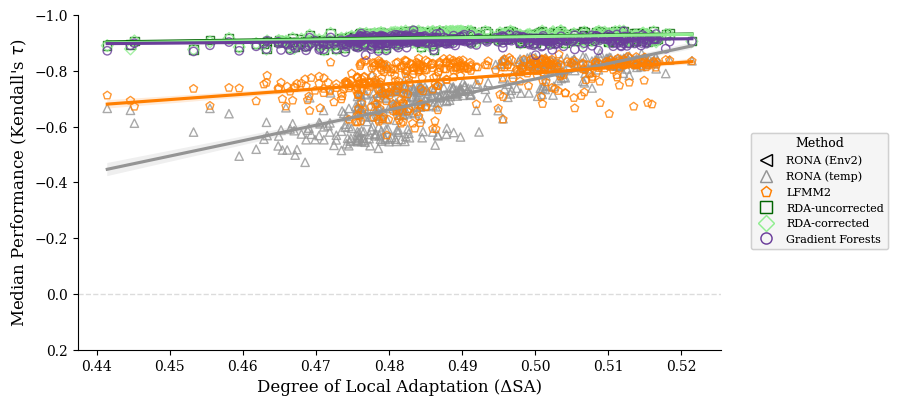

RONA [100]
lfmm2 [100]
GF [100]
rda [200]
['+', 'x', '3']
num_traits = 1
marker_set = 'all'
seed-level median performance for each program

hue = 'landscape' 1
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_1_all_landscape_median_center_left.pdf


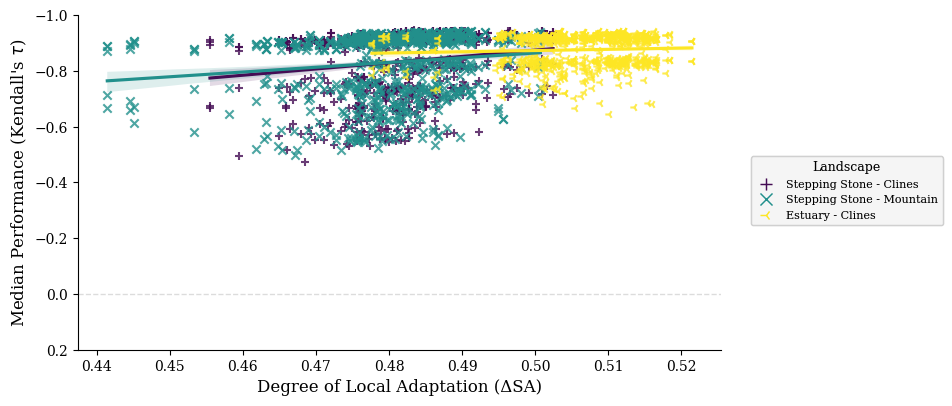

RONA [200]
lfmm2 [100]
GF [100]
rda [200]
	program = 'RONA-sal_opt' 0.08
	program = 'RONA-temp_opt' -0.7
	program = 'lfmm2' -0.59
	program = 'GF' -0.66
	program = 'rda-nocorr' -0.46
	program = 'rda-structcorr' 0.38
['<', '^', 'p', 's', 'D', 'o']
num_traits = 2
marker_set = 'adaptive'
seed-level median performance for each program

hue = 'program' 1
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_2_adaptive_program_median_center_left.pdf


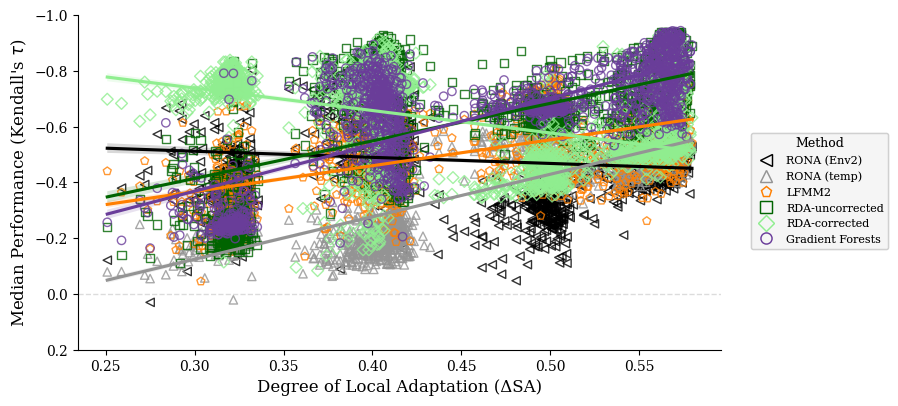

RONA [200]
lfmm2 [100]
GF [100]
rda [200]
['+', 'x', '3']
num_traits = 2
marker_set = 'adaptive'
seed-level median performance for each program

hue = 'landscape' 1
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_2_adaptive_landscape_median_center_left.pdf


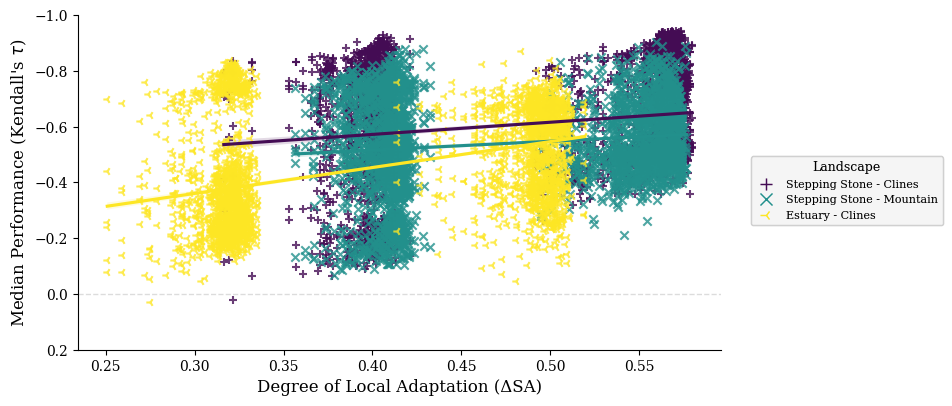

RONA [200]
lfmm2 [100]
GF [100]
rda [200]
	program = 'RONA-sal_opt' -0.19
	program = 'RONA-temp_opt' -0.71
	program = 'lfmm2' -0.82
	program = 'GF' -0.73
	program = 'rda-nocorr' -0.72
	program = 'rda-structcorr' 0.25
['<', '^', 'p', 's', 'D', 'o']
num_traits = 2
marker_set = 'neutral'
seed-level median performance for each program

hue = 'program' 1
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_2_neutral_program_median_center_left.pdf


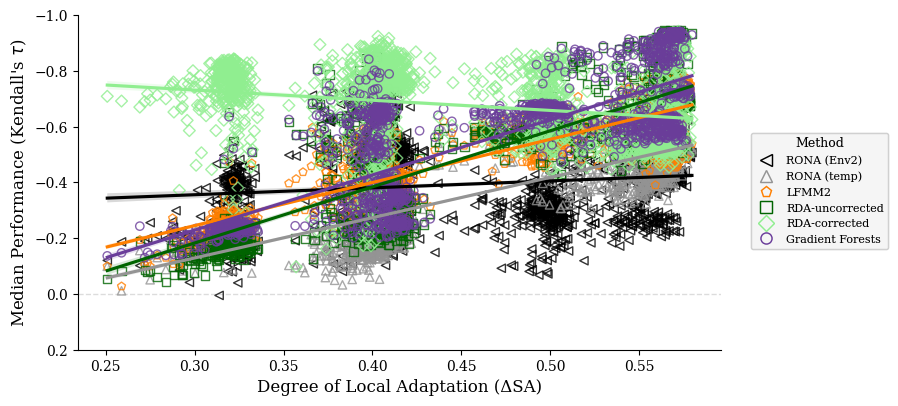

RONA [200]
lfmm2 [100]
GF [100]
rda [200]
['+', 'x', '3']
num_traits = 2
marker_set = 'neutral'
seed-level median performance for each program

hue = 'landscape' 1
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_2_neutral_landscape_median_center_left.pdf


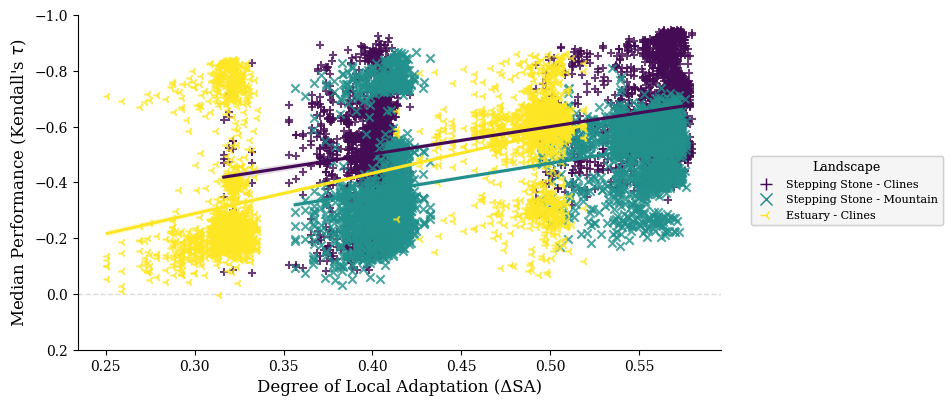

RONA [200]
lfmm2 [100]
GF [100]
rda [200]
	program = 'RONA-sal_opt' -0.17
	program = 'RONA-temp_opt' -0.71
	program = 'lfmm2' -0.82
	program = 'GF' -0.72
	program = 'rda-nocorr' -0.7
	program = 'rda-structcorr' 0.13
['<', '^', 'p', 's', 'D', 'o']
num_traits = 2
marker_set = 'all'
seed-level median performance for each program

hue = 'program' 1
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_2_all_program_median_center_left.pdf


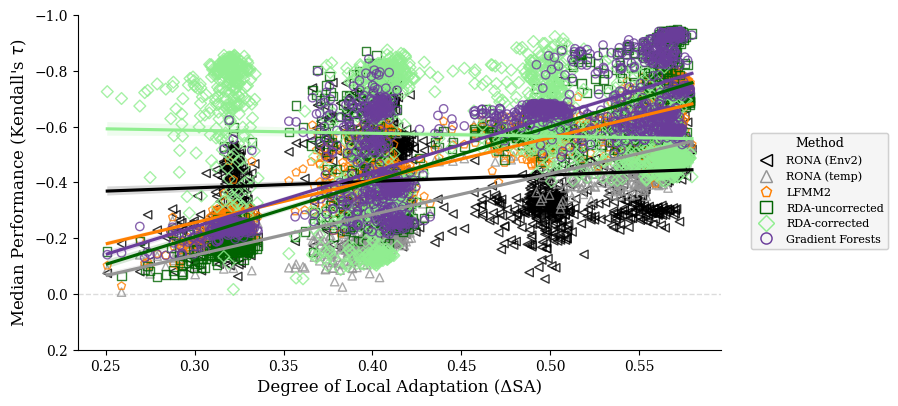

RONA [200]
lfmm2 [100]
GF [100]
rda [200]
['+', 'x', '3']
num_traits = 2
marker_set = 'all'
seed-level median performance for each program

hue = 'landscape' 1
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_2_all_landscape_median_center_left.pdf


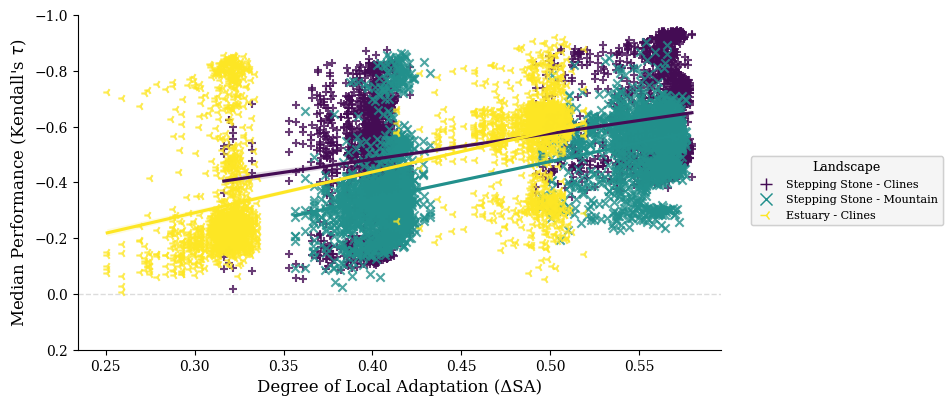

In [8]:
# iterate num_traits, marker_set, hue
for num_traits in [1, 2]:
    for marker_set in ['adaptive', 'neutral', 'all']:
        for hue in ['program', 'landscape']:
            if hue=='program':
                print_cors = True
            else:
                print_cors = False
                
            create_fig(hue=hue, marker_set=marker_set, num_traits=num_traits, apply_median=True,
                       print_cors=print_cors)

RONA [200]
lfmm2 [100]
GF [100]
rda [200]
[nan, nan, nan]
num_traits = 2
marker_set = 'all'
seed-level median performance for each program

hue = 'glevel' 1
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_2_all_glevel_median_center_left.pdf


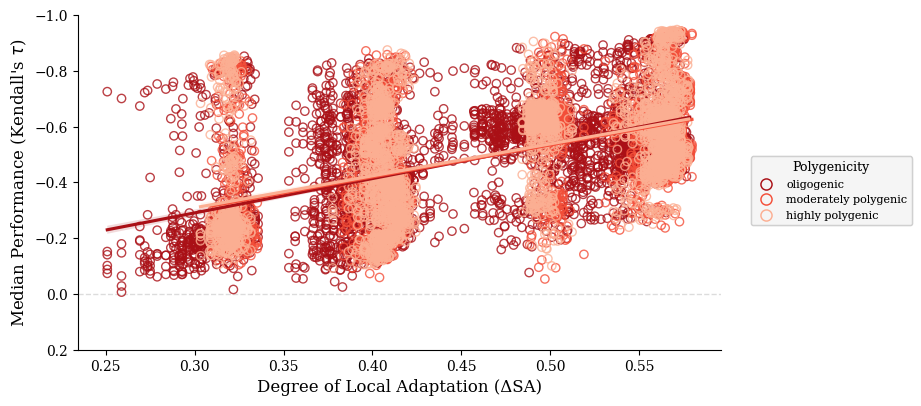

RONA [200]
lfmm2 [100]
GF [100]
rda [200]
[nan, nan]
num_traits = 2
marker_set = 'all'
seed-level median performance for each program

hue = 'pleio' 1
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_2_all_pleio_median_center_left.pdf


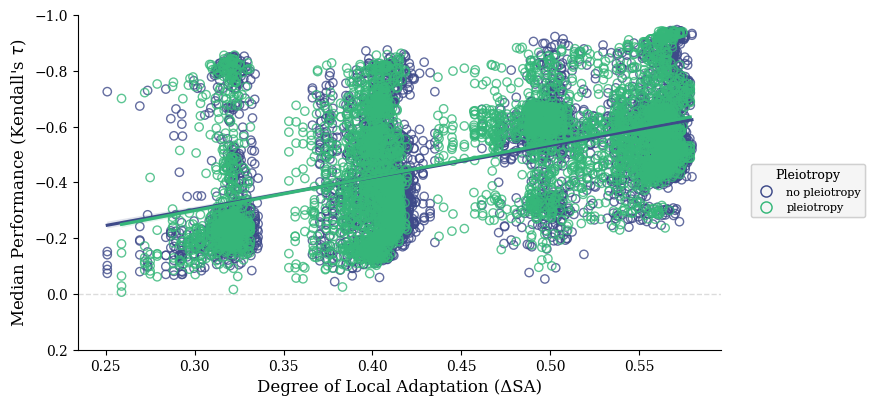

RONA [200]
lfmm2 [100]
GF [100]
rda [200]
[nan, nan]
num_traits = 2
marker_set = 'all'
seed-level median performance for each program

hue = 'slevel' 1
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_2_all_slevel_median_center_left.pdf


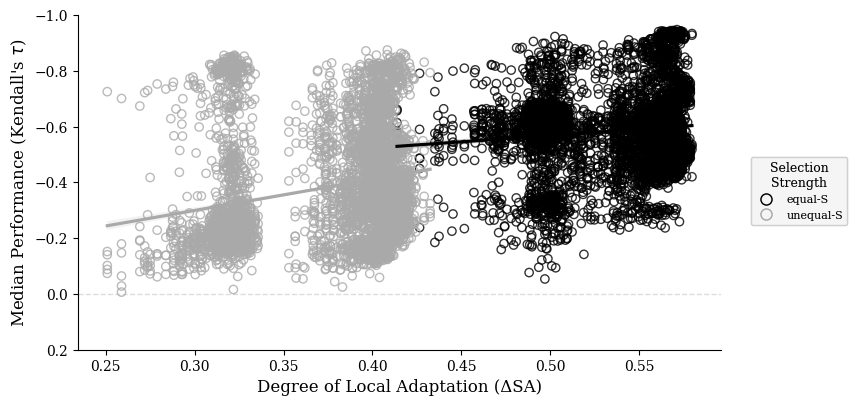

RONA [200]
lfmm2 [100]
GF [100]
rda [200]
[nan, nan, nan, nan]
num_traits = 2
marker_set = 'all'
seed-level median performance for each program

hue = 'popsize' 1
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_2_all_popsize_median_center_left.pdf


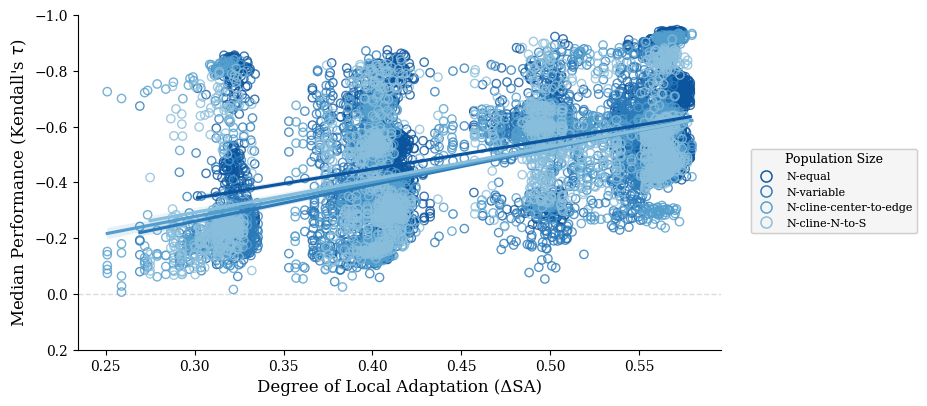

RONA [200]
lfmm2 [100]
GF [100]
rda [200]
[nan, nan, nan]
num_traits = 2
marker_set = 'all'
seed-level median performance for each program

hue = 'migration' 1
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_2_all_migration_median_center_left.pdf


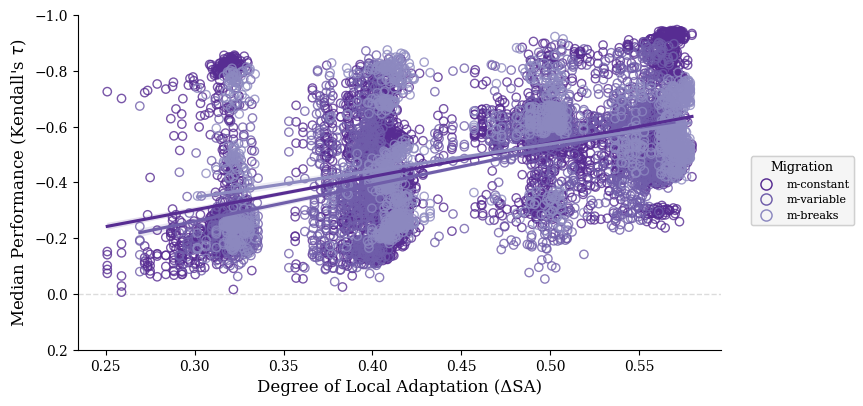

RONA [200]
lfmm2 [100]
GF [100]
rda [200]
[nan, nan, nan]
num_traits = 2
marker_set = 'all'
seed-level median performance for each program

hue = 'marker_set' 1
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_2_all_marker_set_median_center_left.pdf


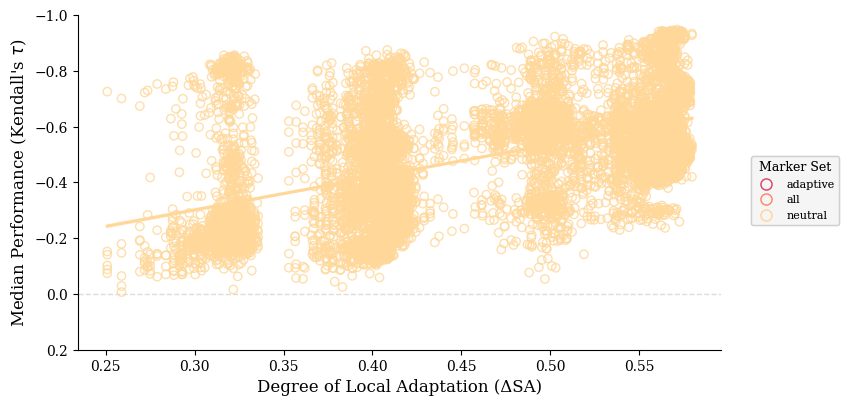

RONA [200]
lfmm2 [100]
GF [100]
rda [200]
[nan, nan, nan, nan, nan]
num_traits = 2
marker_set = 'all'
seed-level median performance for each program

hue = 'demography' 1
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/04_performance_vs_local-adaptation/final_LA_vs_validation_2_all_demography_median_center_left.pdf


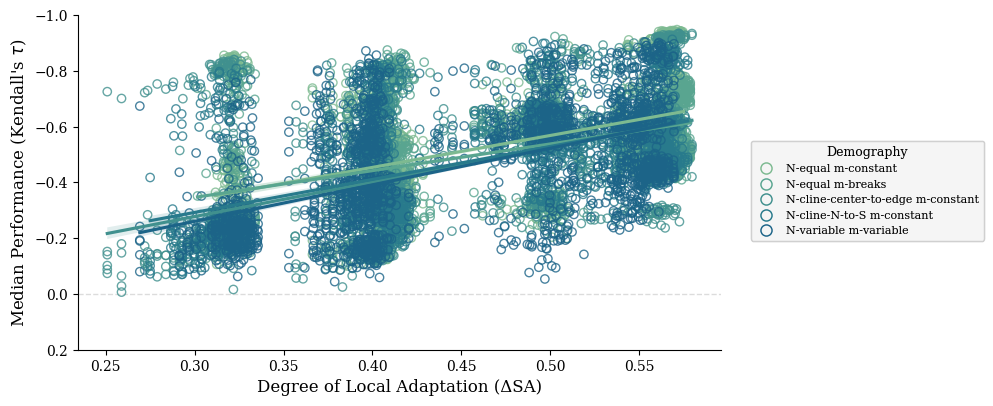

In [12]:
# now color 2-trait evaluation with simulation parameters
num_traits = 2
marker_set = 'all'
for hue in mvp.hue_order.keys():
    if hue in ['program', 'noncausal_env', 'landscape']:  # 'marker_set',
        continue
        
    create_fig(hue=hue, marker_set=marker_set, num_traits=num_traits, apply_median=True)

In [13]:
formatclock(dt.now() - t1, exact=True)

'0-01:19:28'

In [ ]:
# hue_dicts = {}
# for hue in keys(mvp.hue_order):
#     if hue in ['program', 'final_la_bin']:
#         continue
        
#     hue_dicts[hue] = all_scores['GF'][hue].to_dict()  # key = seed val = hue ('GF' key doesn't matter)

# def create_sns_dataframe(data, print_cors=False):
#     """Create long-form dataframe for seaborn."""
#     df = pd.DataFrame(columns=['seed', 'program', 'score', 'shape', 'landscape'])
#     for program, seed_scores in data.items():  # seed_scores is pd.Series w/index=seed & value=score; name='score'
#         seeddf = pd.DataFrame(seed_scores)
#         seeddf['program'] = program
#         seeddf['seed'] = seeddf.index.tolist()
#         seeddf['landscape'] = seeddf.index.map(landscape_dict)
#         seeddf['shape'] = seeddf.program.map(mvp.markers)
        
#         df = df.append(seeddf)

#     summary = mvp.get_summary_data()
            
#     df['final_LA'] = df.seed.map(summary['final_LA'])

#     df['seed'] = df['seed'].astype(int)
#     df['score'] = df['score'].astype(float)
#     df['final_LA'] = df['final_LA'].astype(float)
    
#     if print_cors is True:
#         for program in df.program.unique():
#             prog_df = df[df.program == program].copy()
#             rho = prog_df.score.corr(prog_df.final_LA, method='spearman').round(2)
#             print(f'\t{program = }', rho)
    
#     for hue, hue_dict in hue_dicts.items():
#         df[hue] = df.index.map(hue_dict)

#     return df


# def create_fig(num_traits=1, marker_set='all', hue='program', apply_median=True, loc='center left',
#                markerfacecolor='none', print_cors=False):
#     """Use kwargs to filter data to create lmplot colored by `hue`.
    
#     Notes
#     -----
#     - filtering with subset_data will include ntraits-1 and ntraits-2 for 1-trait sims.
#     """
# #     def subset_dataframe(df, num_traits=None, ntraits=None, marker_set=None, remove_structcrxn=False,
#                             # keep_nuisance=True, remove_rda_outliers=True, bcs=False):
# #     filtering criteria:
# #         use_bcs_data = False
# #         performance = garden_performance
# #         num_traits = None
# #         ntraits = None
# #         marker_set = None
# #         remove_structcrxn = False
# #         keep_nuisance = False
# #         remove_rda_outliers = True
        
#     data = create_sns_dataframe(
#         mvp.subset_data_scores(all_scores, num_traits=num_traits, marker_set=marker_set,
#                                keep_nuisance=False, apply_median=apply_median),
#         print_cors=print_cors
#     )

#     program_order = mvp.hue_order['program'] #['RONA-sal_opt', 'RONA-temp_opt', 'lfmm2', 'rda', 'GF']
    
#     if hue in ['program', 'landscape']:
#         markers = pd.Series(mvp.hue_order[hue]).map(mvp.markers).tolist()
#         if hue == 'landscape':
#             markers = markers[::-1]  # reversed because of reversed plotting 
#     else:
#         markers = None

#     g = sns.lmplot(
#         data=data,
#         x='final_LA',
#         y='score',
#         hue=hue,
#         hue_order=mvp.hue_order[hue][::-1] if hue == 'landscape' else mvp.hue_order[hue],
#         scatter_kws={'facecolor' : 'none'}, # if hue != 'landscape' else None,
#         palette=mvp.boxplot_kwargs['palette'],
#         legend=False,
#         markers=markers
#     )
    
#     #     g.ax.set_title(f'{num_traits = }\n{marker_set = }\nseed-level median performance for each program\n')
#     print(f'{num_traits = }\n{marker_set = }\nseed-level median performance for each program\n')
    
#     g.ax.set_ylim((-1, 0.2))  # i know nothing goes beyond 0.2 - 🧠
    
#     g.set_axis_labels("Degree of Local Adaptation", "Median Performance (Kendall's $\\tau$)", fontsize=12)
    
#     g.ax.axhline(0, linestyle='--', color='gainsboro', linewidth=1, zorder=0)
    
#     g.ax.set_ylim(g.ax.get_ylim()[::-1])
    
#     g.tight_layout()
    
#     if loc == 'upper center':
#         kwargs = dict(loc='upper center', bbox_to_anchor=(0.52, 1.08), ncol='auto') 
#         if hue == 'program':
#             kwargs.update({'bbox_to_anchor' : (0.52, 1.15)})
#     elif loc == 'center left':
#         kwargs = dict(loc='center left', bbox_to_anchor=(1.0, 0.52), ncol=1)
    
#     print(f'{hue = }', kwargs['ncol'])
    
#     mvp.add_legend(g.figure, color_by=hue, fontsize=8,
#                    use_markers=True if hue in ['program', 'landscape'] else False,
#                    legendmarkerfacecolor=markerfacecolor,
#                    **kwargs
#                   )

#     g.figure.set_size_inches((8, 4))
    
#     points = 'median' if apply_median is True else 'allgardens'
    
#     loc = loc.replace(' ','_')
#     save_pdf(op.join(savedir, f'final_LA_vs_validation_{num_traits}_{marker_set}_{hue}_{points}_{loc}.pdf'))
    
#     plt.show()
    
# #     pass